In [3]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer

In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

class BiDirectionalTransformer(nn.Module):
    def __init__(self, hidden_size=768, num_labels=2):
        super(BiDirectionalTransformer, self).__init__()
        self.bert = bert_model
        self.fc = nn.Linear(hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_state, dim=1)
        logits = self.fc(pooled_output)
        return logits

In [11]:
def preprocess_data(sentence, label):
    # Assuming tokenizer is properly defined
    tokens = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)

    # Convert label to tensor
    label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type

    return tokens['input_ids'].squeeze(), label_tensor

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

df = pd.read_csv('swap.csv')

train_df, test_df = train_test_split(df, test_size=0.1, shuffle=True, random_state=42)

class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return {'sentence': self.data.iloc[idx]['sentence'], 'label': self.data.iloc[idx]['label']}

train_dataset = CustomDataset(train_df)
test_dataset = CustomDataset(test_df)

batch_size = 5
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 1: 0.8230088495575221
Macro F1-score after epoch 1: 0.8213156230234029


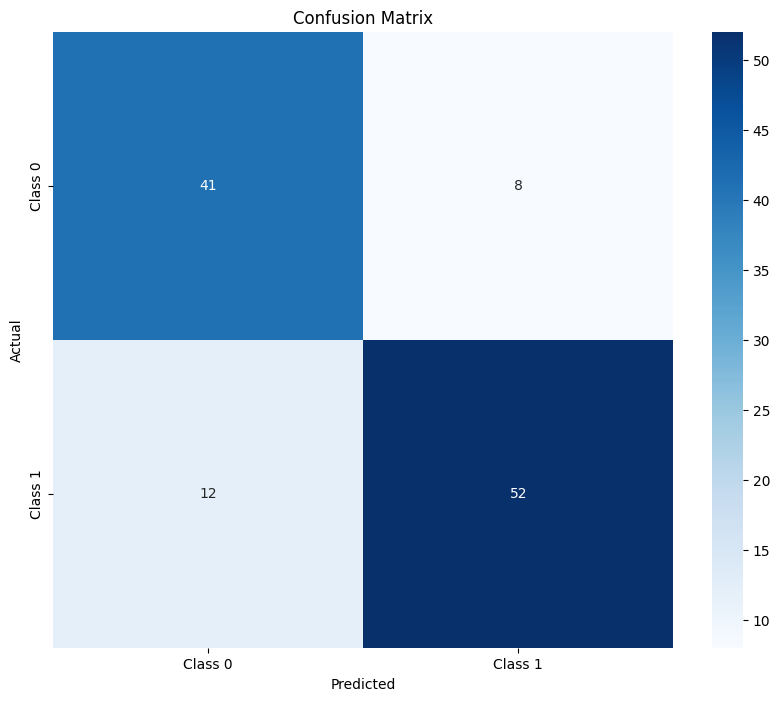

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 2: 0.8230088495575221
Macro F1-score after epoch 2: 0.822884012539185


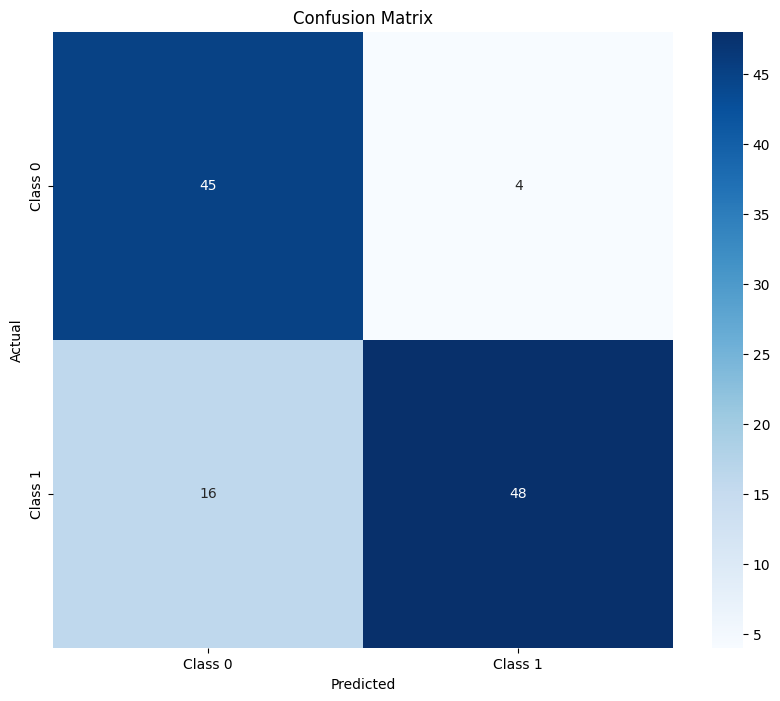

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 3: 0.8495575221238938
Macro F1-score after epoch 3: 0.8446923761015441


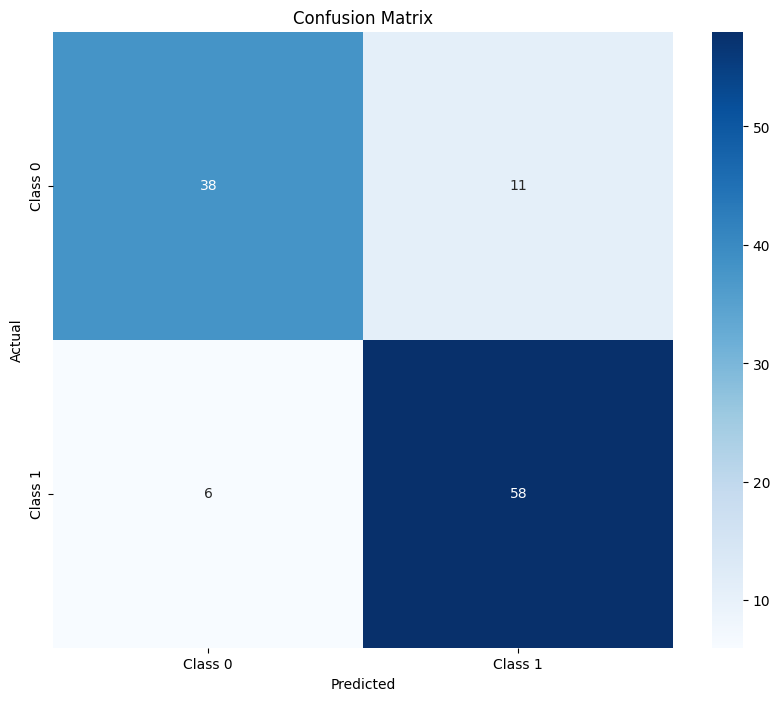

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 4: 0.7522123893805309
Macro F1-score after epoch 4: 0.745003223726628


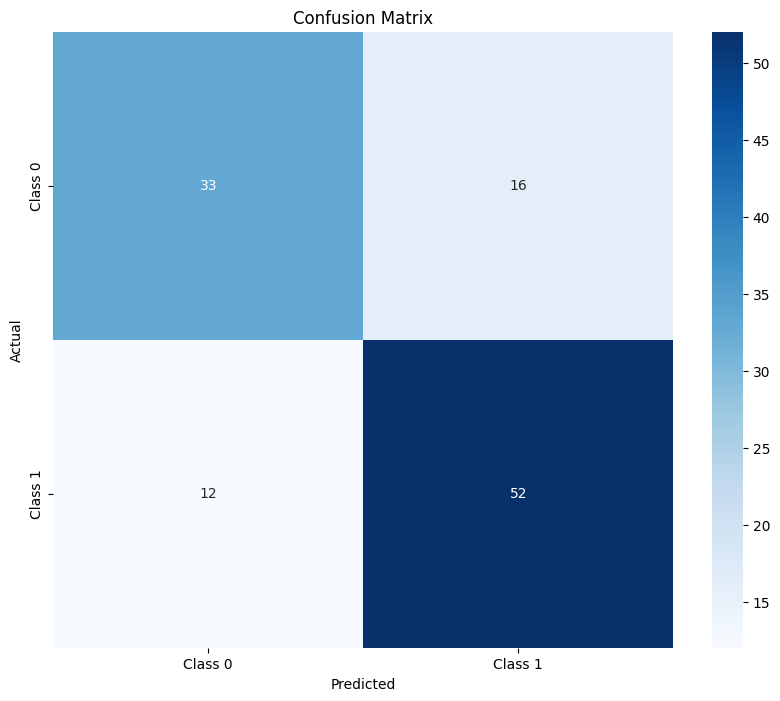

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 5: 0.7964601769911505
Macro F1-score after epoch 5: 0.7850822790043827


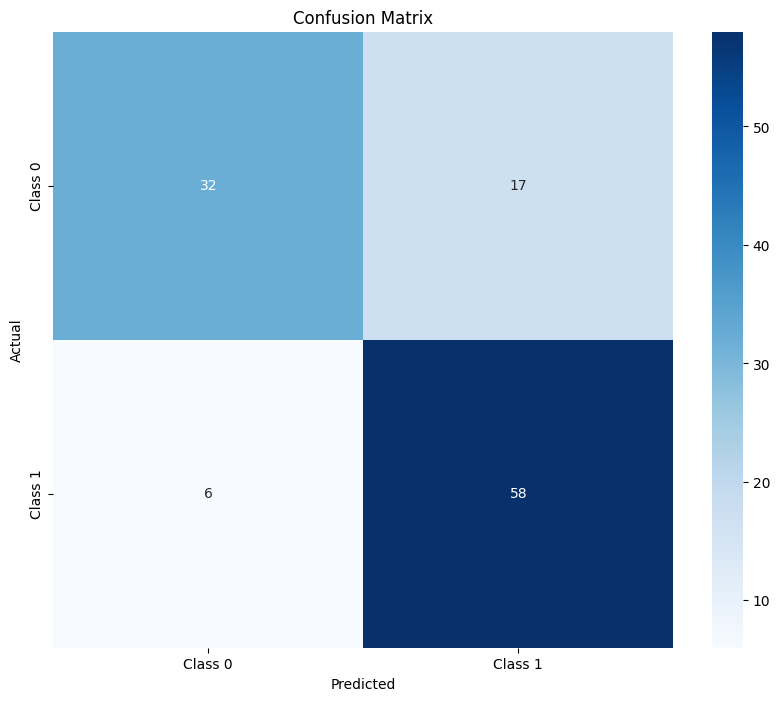

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 6: 0.8141592920353983
Macro F1-score after epoch 6: 0.8081494057724958


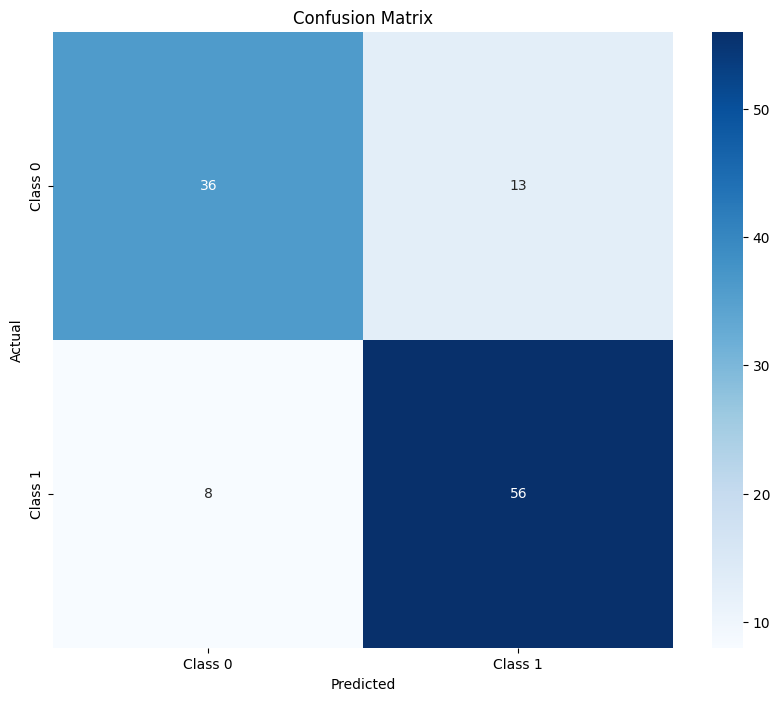

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 7: 0.8230088495575221
Macro F1-score after epoch 7: 0.815359477124183


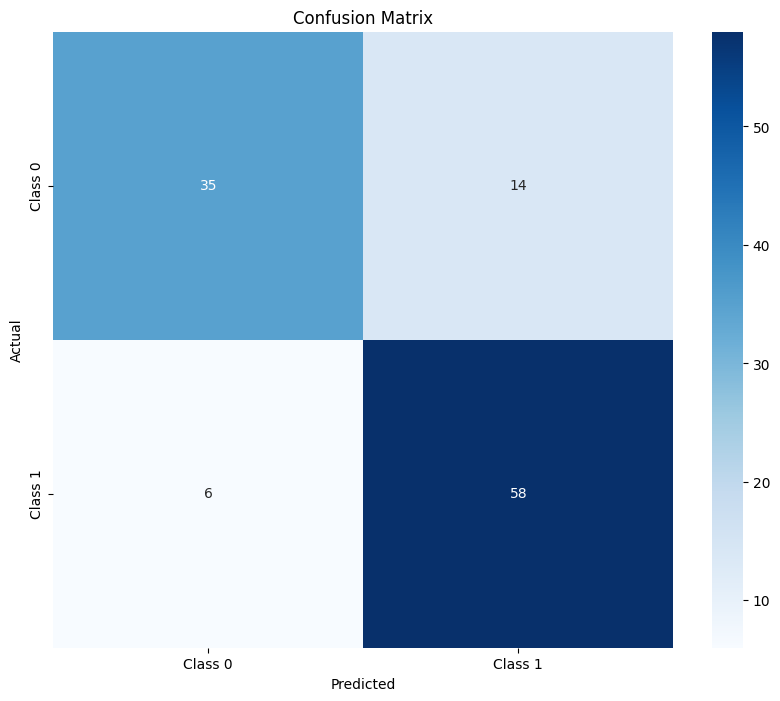

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 8: 0.831858407079646
Macro F1-score after epoch 8: 0.8252340252340253


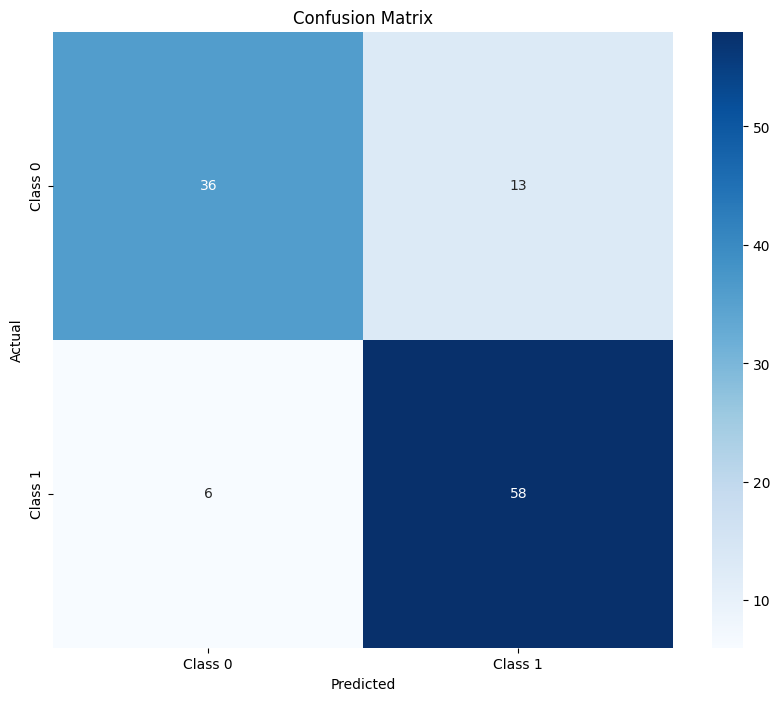

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 9: 0.7964601769911505
Macro F1-score after epoch 9: 0.7850822790043827


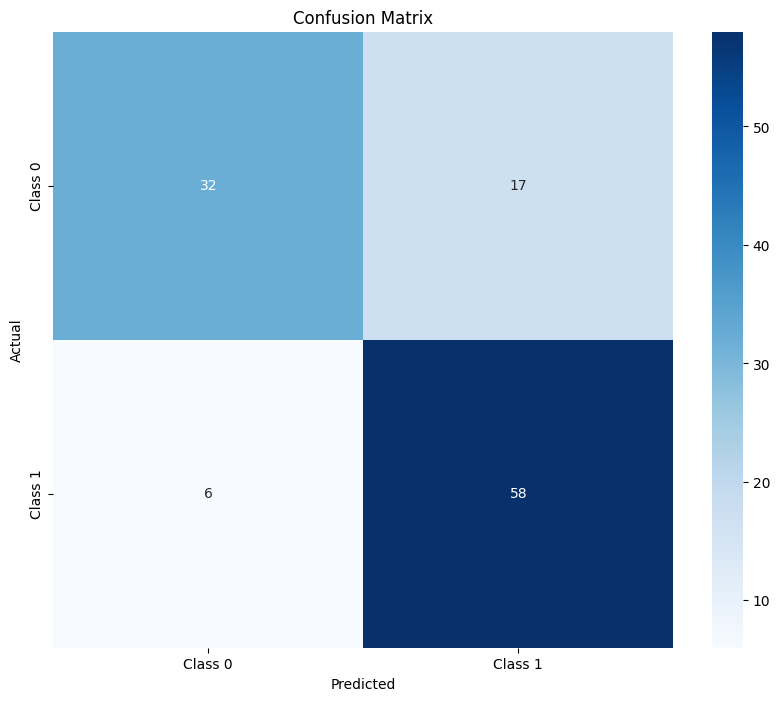

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 10: 0.831858407079646
Macro F1-score after epoch 10: 0.8252340252340253


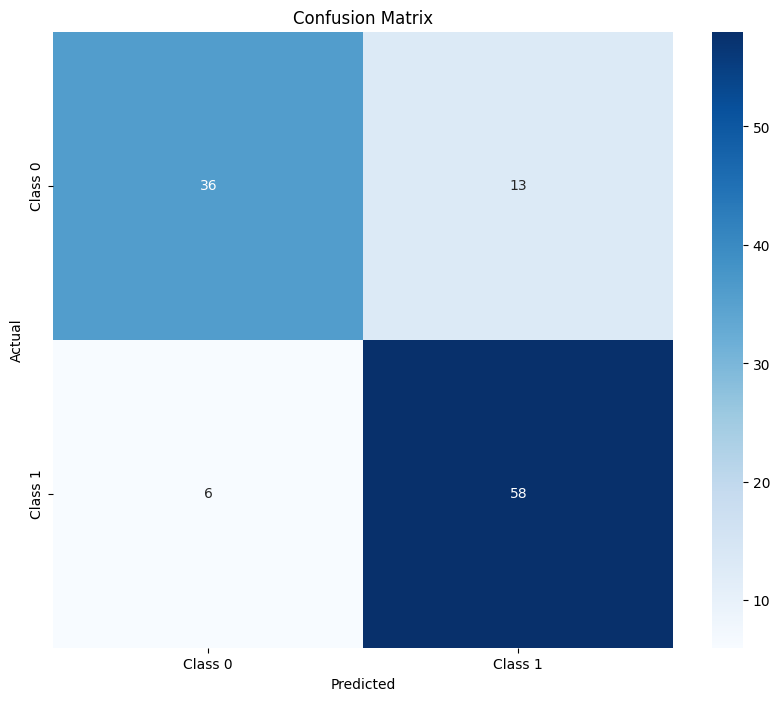

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 11: 0.8230088495575221
Macro F1-score after epoch 11: 0.815359477124183


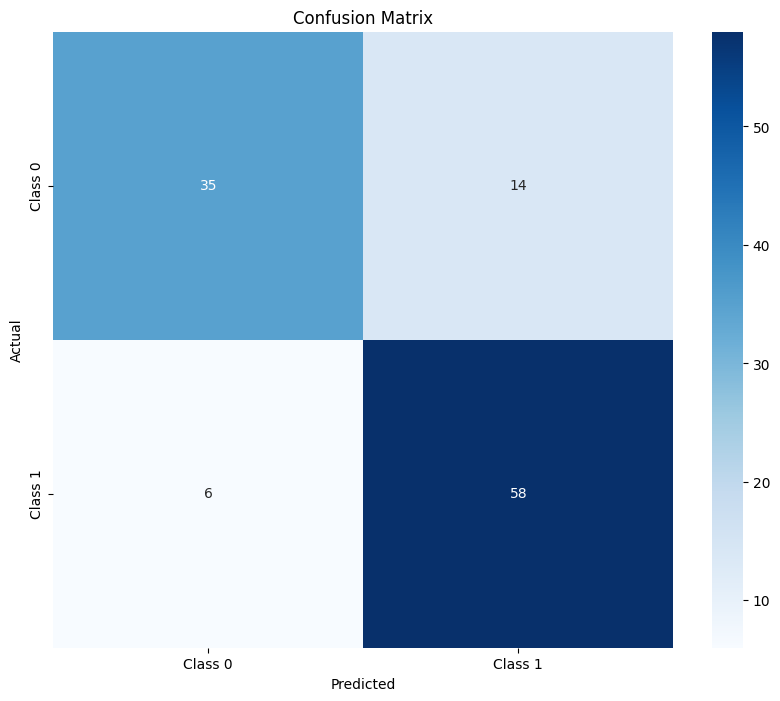

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 12: 0.8230088495575221
Macro F1-score after epoch 12: 0.815359477124183


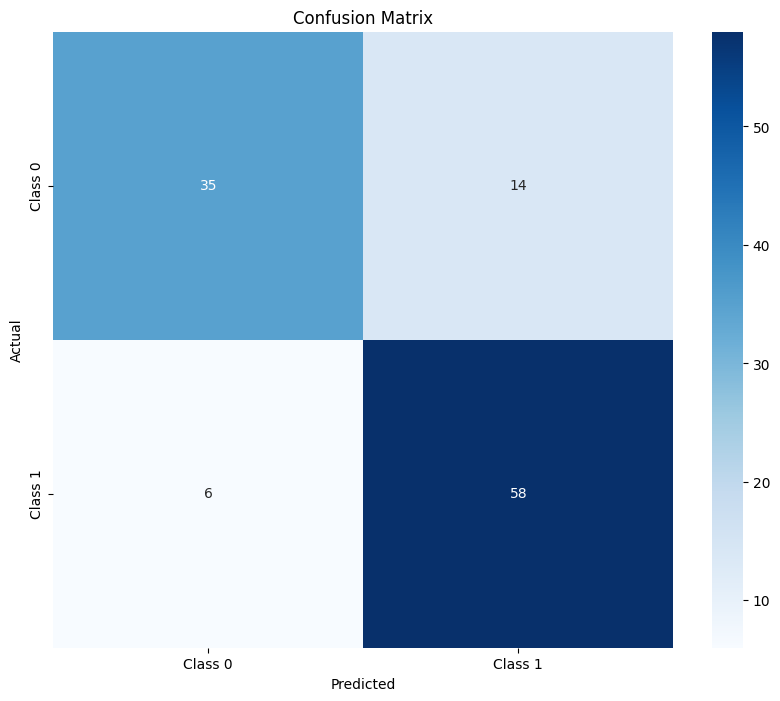

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 13: 0.831858407079646
Macro F1-score after epoch 13: 0.8252340252340253


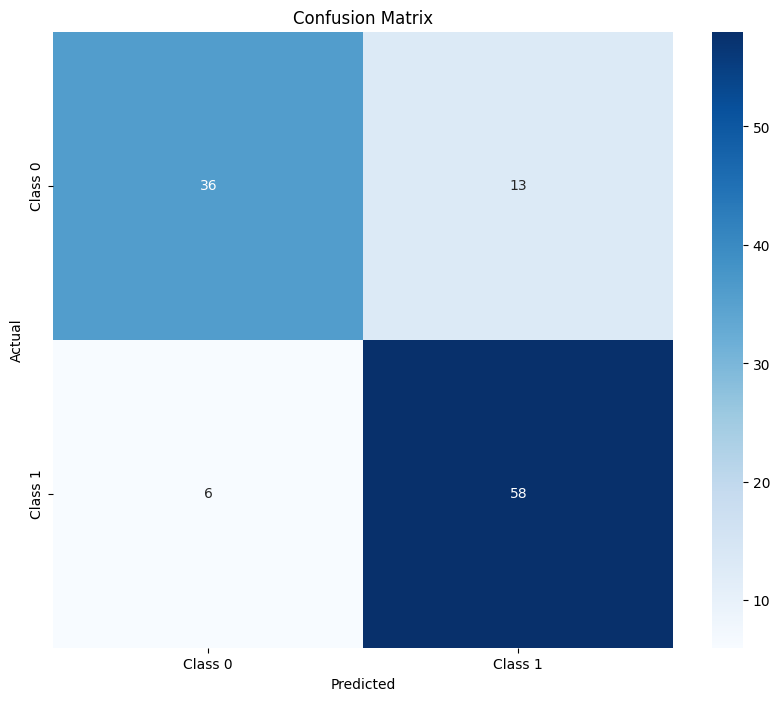

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 14: 0.8230088495575221
Macro F1-score after epoch 14: 0.815359477124183


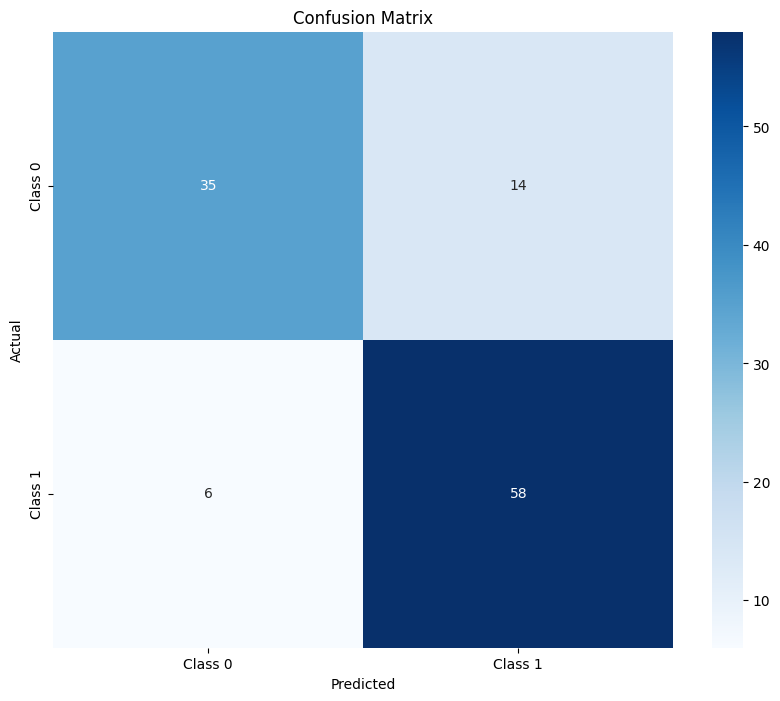

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 15: 0.831858407079646
Macro F1-score after epoch 15: 0.8252340252340253


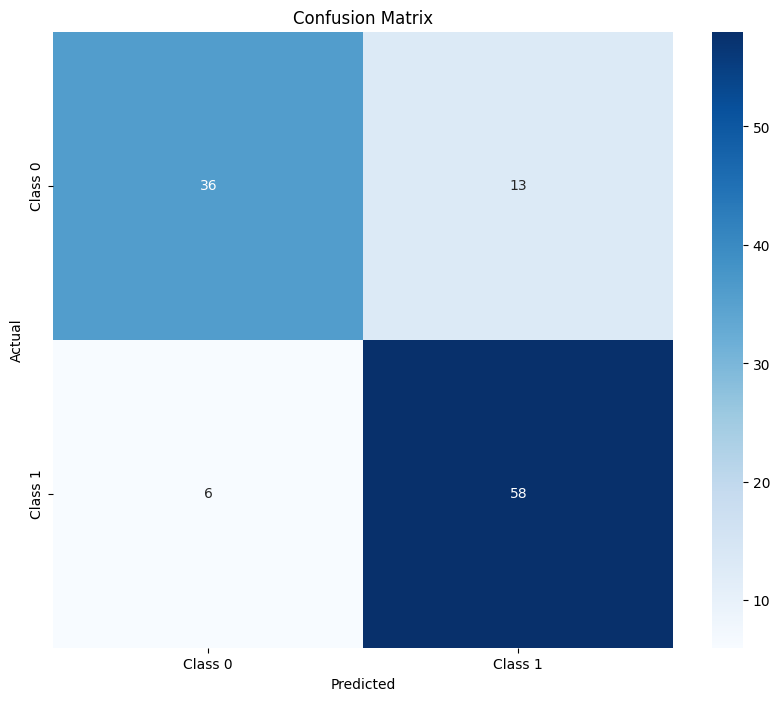

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 16: 0.8230088495575221
Macro F1-score after epoch 16: 0.815359477124183


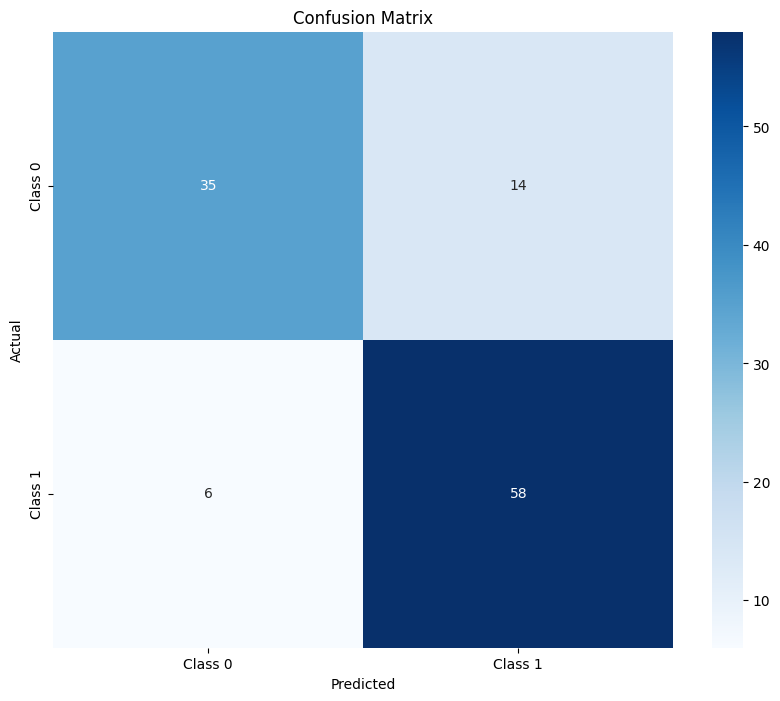

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 17: 0.8230088495575221
Macro F1-score after epoch 17: 0.815359477124183


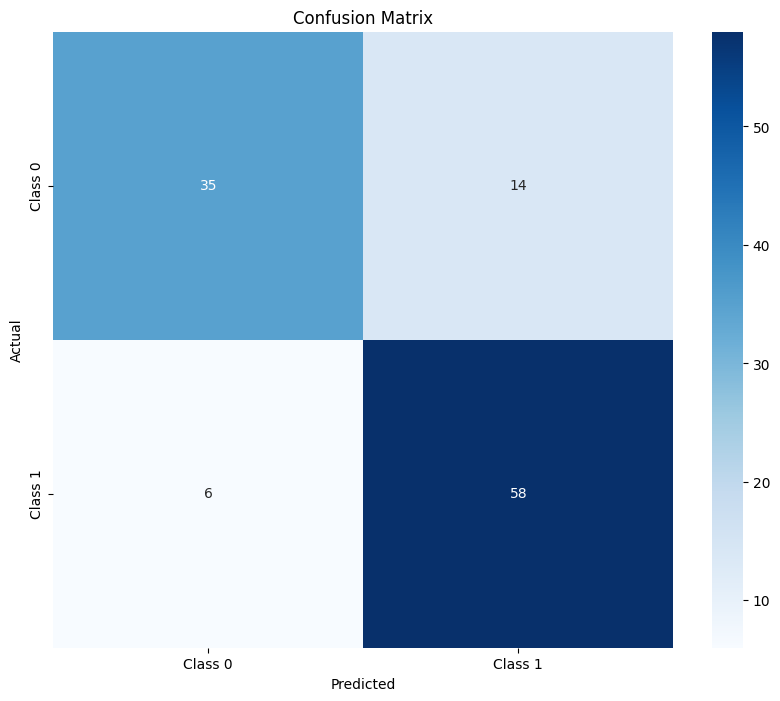

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 18: 0.8141592920353983
Macro F1-score after epoch 18: 0.805380136143689


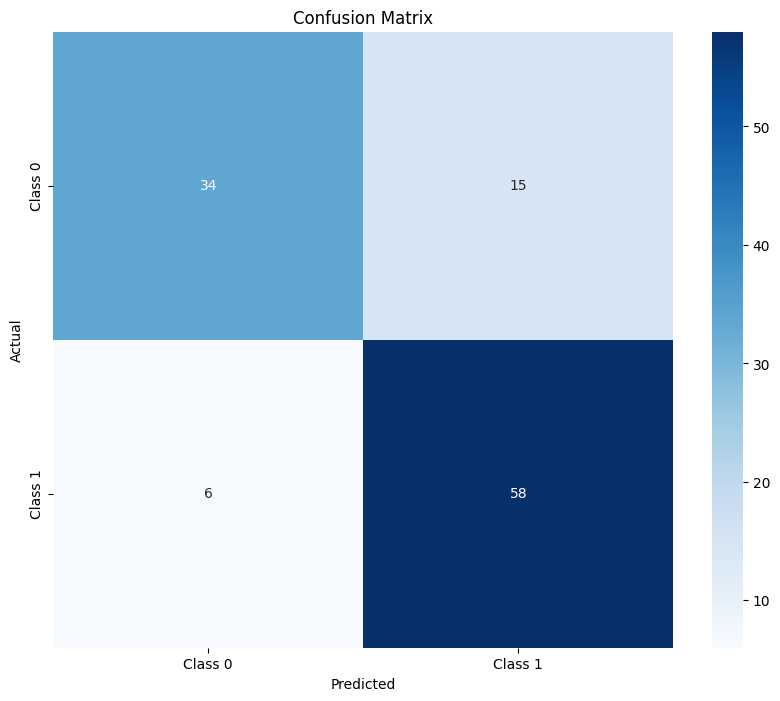

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 19: 0.7964601769911505
Macro F1-score after epoch 19: 0.7850822790043827


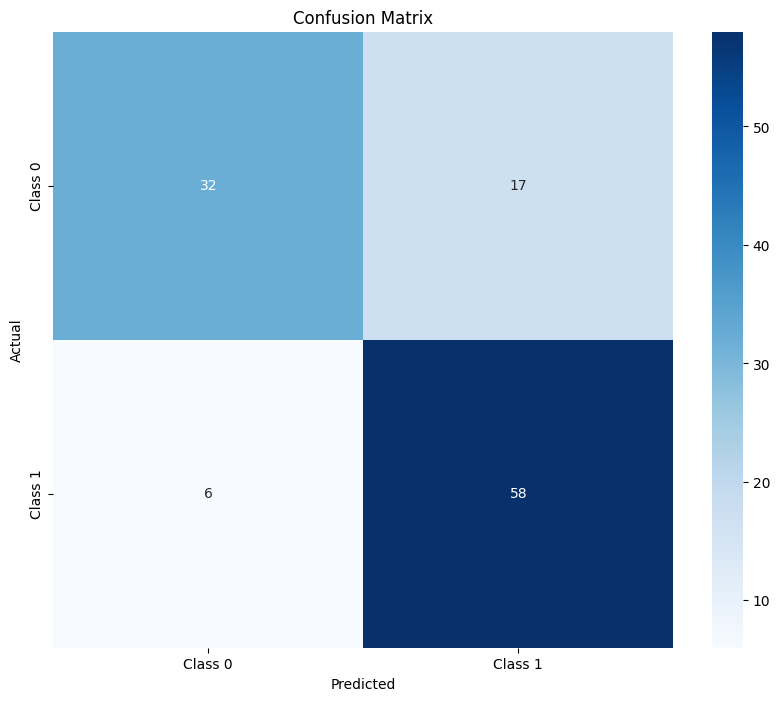

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 20: 0.831858407079646
Macro F1-score after epoch 20: 0.8252340252340253


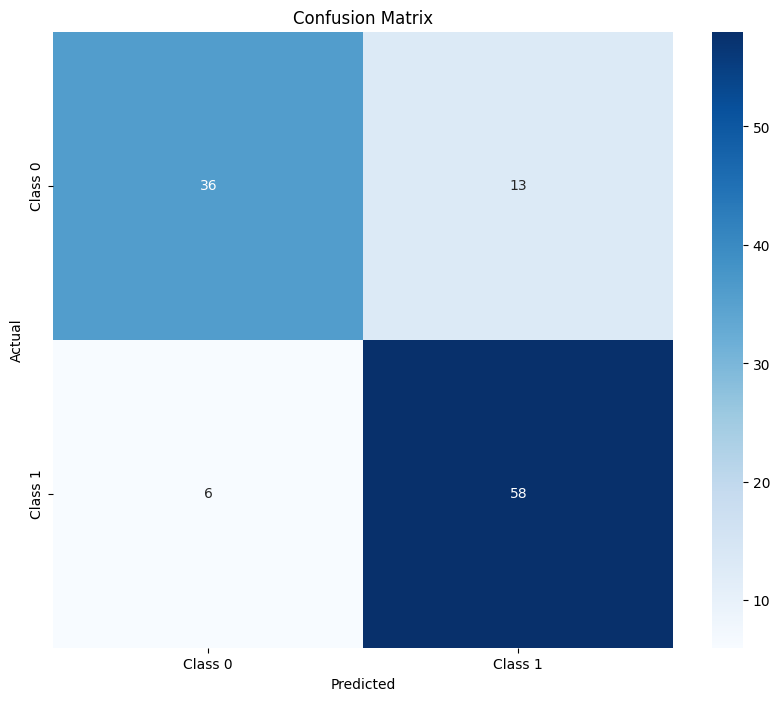

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 21: 0.7787610619469026
Macro F1-score after epoch 21: 0.7642886942010847


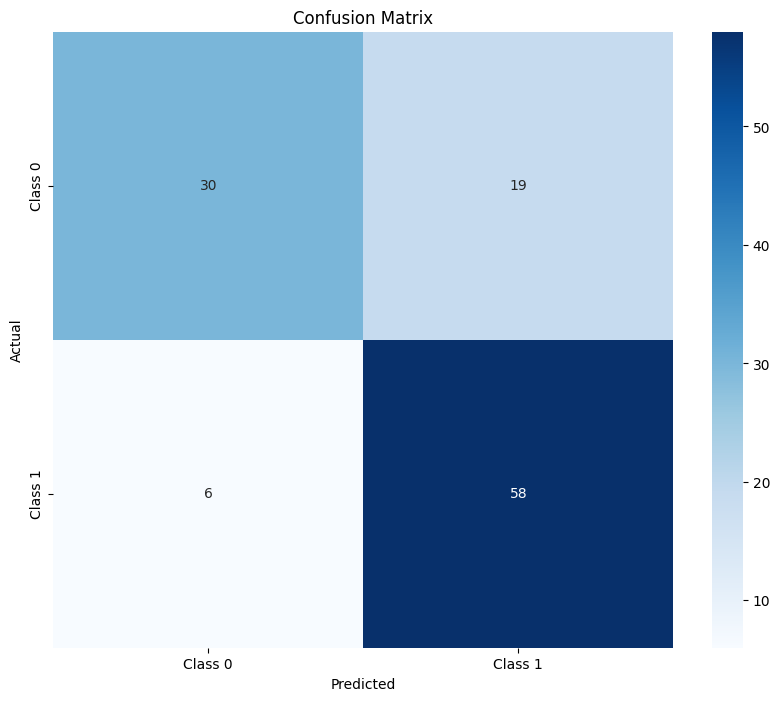

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 22: 0.7787610619469026
Macro F1-score after epoch 22: 0.7642886942010847


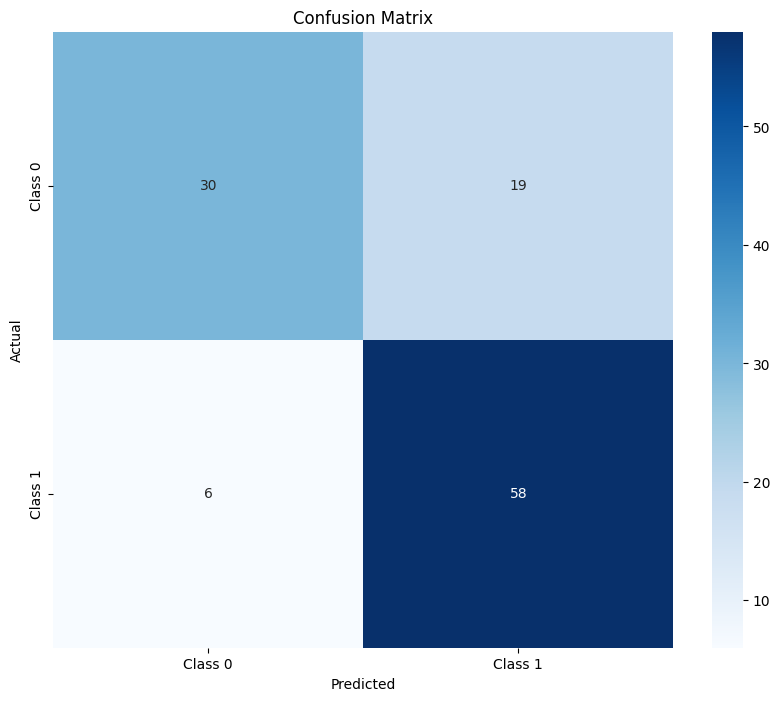

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 23: 0.7964601769911505
Macro F1-score after epoch 23: 0.7850822790043827


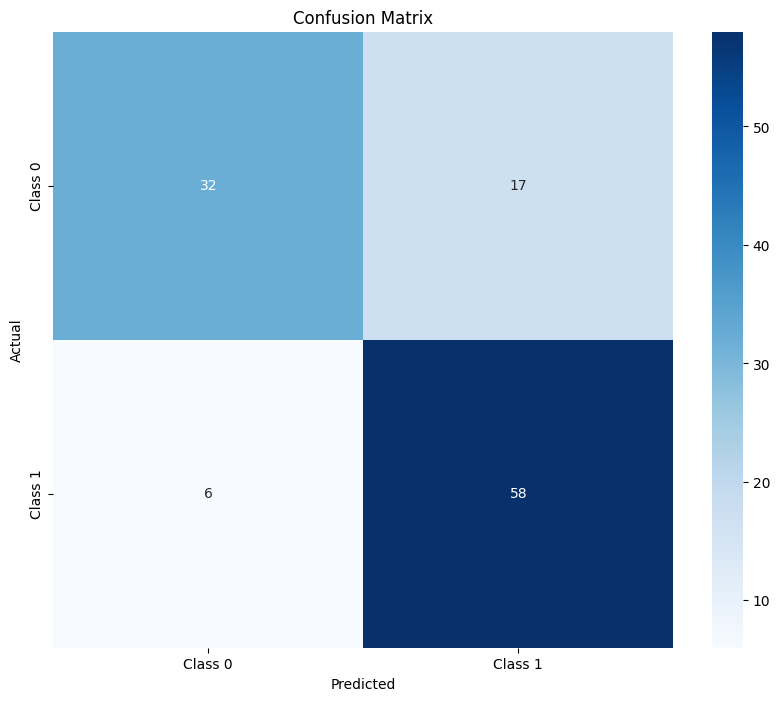

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 24: 0.8230088495575221
Macro F1-score after epoch 24: 0.815359477124183


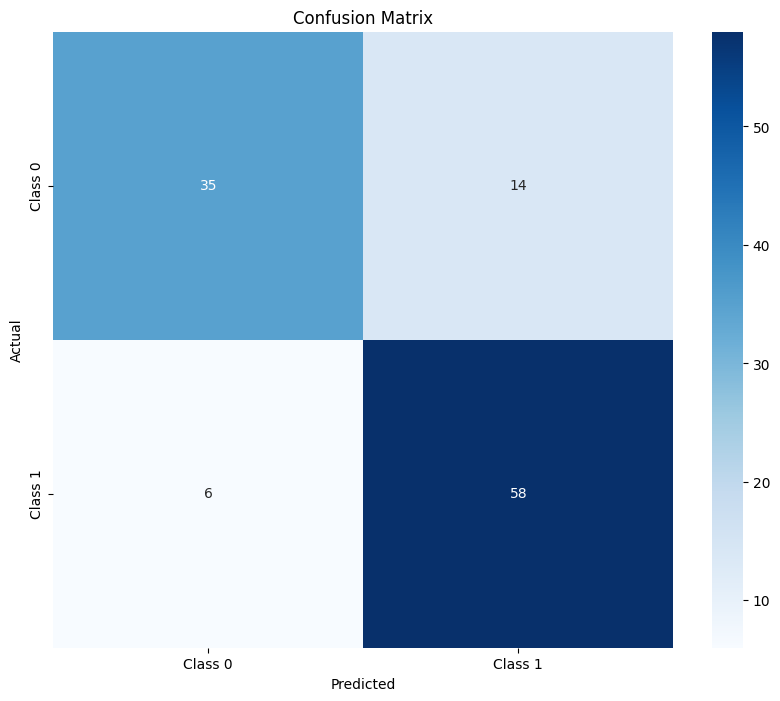

<ipython-input-11-e91426ea539d>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_tensor = torch.tensor(label, dtype=torch.long)  # Assuming the label is of integer type


Test Accuracy after epoch 25: 0.831858407079646
Macro F1-score after epoch 25: 0.8252340252340253


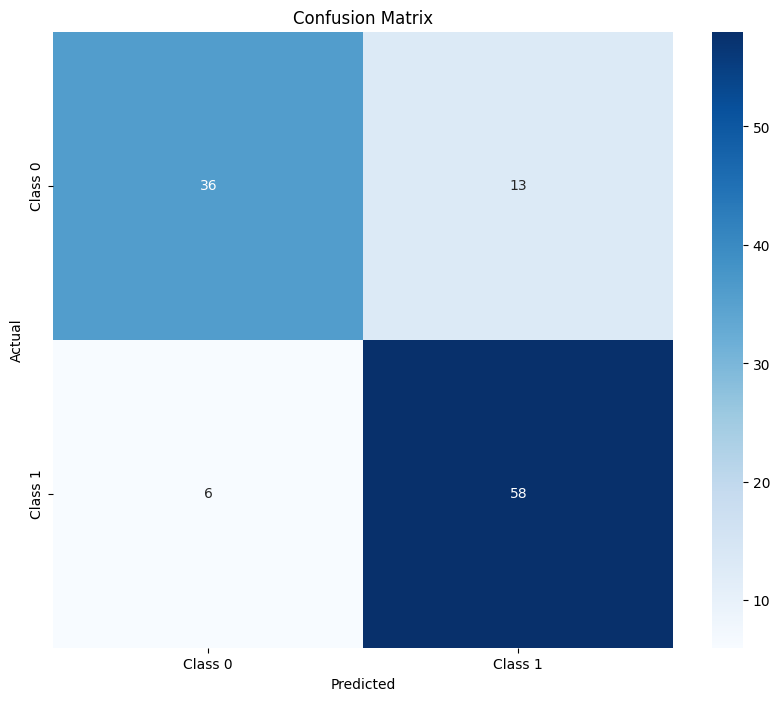

In [13]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_list, f1_list = [], []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BiDirectionalTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    for batch in train_data_loader:
        input_ids, labels = preprocess_data(batch['sentence'], batch['label'])
        input_ids, labels = input_ids.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(input_ids, attention_mask=(input_ids != 0).float())
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

    model.eval()
    total_correct = 0
    total_samples = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in test_data_loader:
            input_ids, labels = preprocess_data(batch['sentence'], batch['label'])
            input_ids, labels = input_ids.to(device), labels.to(device)
            logits = model(input_ids, attention_mask=(input_ids != 0).float())
            predictions = torch.argmax(logits, dim=1)
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='macro')  # or 'micro' or 'weighted' depending on your requirement
    accuracy_list.append(accuracy)
    f1_list.append(f1)

    print(f'Test Accuracy after epoch {epoch + 1}: {accuracy}')
    print(f'Macro F1-score after epoch {epoch + 1}: {f1}')

    cm = confusion_matrix(all_labels, all_predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
